In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("preprocessed_placementdata.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [3]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_21780\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ssc_p', ylabel='Density'>

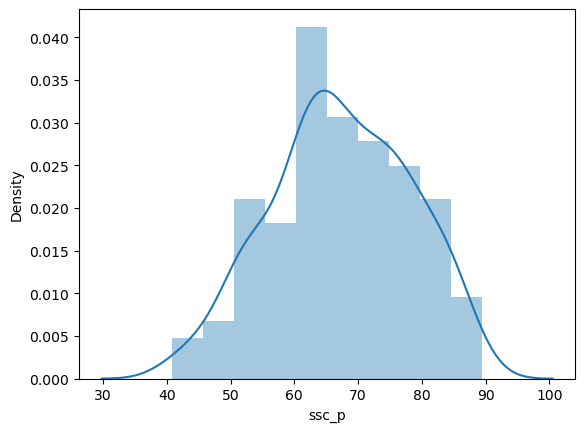

In [5]:
sns.distplot(dataset["ssc_p"])

In [6]:
def get_pdf_probability(dataset,startrange,endrange):
    # import the importance of library
    from matplotlib import pyplot
    # inbuilt function for normal distribution library
    from scipy.stats import norm
    # vizualization representation
    import seaborn as sns
    # distplot is kde(Kernel density function)=True the curve will diply ,false the curve will the be not disply
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'Red'},color='Green')
    # axvline is virtical line startrange color
    pyplot.axvline(startrange,color='yellow')
    # axvline is virtical line endrange color
    pyplot.axvline(endrange,color='yellow')
    # above this line the graph creating 
    # Below lines for calculation
    # generate a sample
    sample=dataset
    # calculate the mean,std parameters 
    sample_mean=sample.mean()
    sample_std=sample.std()
    # print the mean ,std
    print('Mean=%.3f,Standard Deviation=%.3f'%(sample_mean,sample_std))
    # define the distribution
    # There is the normal distribution funcation.lear distributionPattern 
    dist=norm(sample_mean,sample_std)
    
    # sample probabilities for a range of outcomes
    # advantage of below line is in single line the output it  is converted into list it is call to one-liner for loop
    values=[]
    for value in range(startrange,endrange):
        values.append(value)
    # whole probabilities summation the below lines
    probabilities=[dist.pdf(value)for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
                

Mean=67.303,Standard Deviation=10.827
The area between range(50,60):0.18546701731204907


C:\Users\DELL\AppData\Local\Temp\ipykernel_21780\388039783.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'Red'},color='Green')
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.18546701731204907

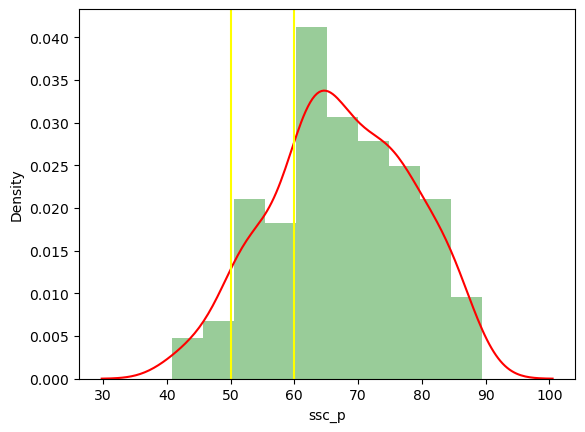

In [7]:
get_pdf_probability(dataset["ssc_p"],50,60)